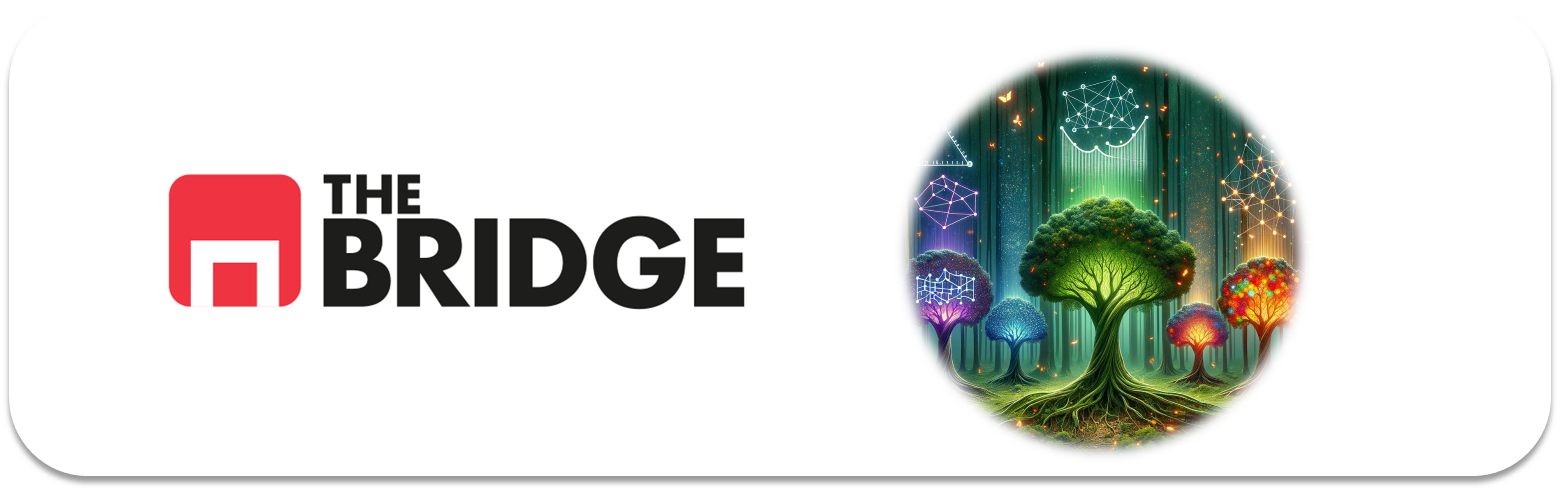

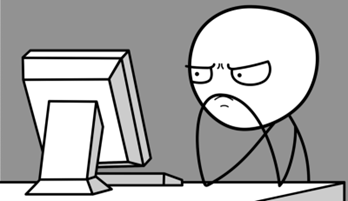

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [30]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt




### Ejercicio 1

Importa el csv "temps.csv"

In [3]:
df = pd.read_csv('data/temps.csv')

### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [ ]:
df.head()


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [7]:
df.week.value_counts()

week
Tues     52
Fri      50
Sat      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

In [22]:
# Aplicar el OneHotEncoding a la columna 'week'
encoded_week = encoder.fit_transform(df[['week']])

# Crear un nuevo DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_week, columns=encoder.categories_[0])

# Unir las columnas codificadas con el DataFrame original y eliminar la columna 'week'
df = pd.concat([df.drop('week', axis=1), encoded_df], axis=1)

# Mostrar el DataFrame final
print(df)


     year  month  day  temp_2  temp_1  average  actual  forecast_noaa  \
0    2016      1    1      45      45     45.6      45             43   
1    2016      1    2      44      45     45.7      44             41   
2    2016      1    3      45      44     45.8      41             43   
3    2016      1    4      44      41     45.9      40             44   
4    2016      1    5      41      40     46.0      44             46   
..    ...    ...  ...     ...     ...      ...     ...            ...   
343  2016     12   27      42      42     45.2      47             41   
344  2016     12   28      42      47     45.3      48             41   
345  2016     12   29      47      48     45.3      48             43   
346  2016     12   30      48      48     45.4      57             44   
347  2016     12   31      48      57     45.5      40             42   

     forecast_acc  forecast_under  friend  Fri  Mon  Sat  Sun  Thurs  Tues  \
0              50              44      29  1.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    int64  
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  Fri             348 non-null    float64
 12  Mon             348 non-null    float64
 13  Sat             348 non-null    float64
 14  Sun             348 non-null    float64
 15  Thurs           348 non-null    float64
 16  Tues            348 non-null    float64
 17  Wed             348 non-null    flo

### Ejercicio 3

Divide en train y test

In [24]:
y = df['actual'] 
X = df.drop(columns=['actual'])  # Eliminar 'week', 'week_binary' y 'count' para las variables independientes


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)



### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [26]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [28]:
from sklearn.metrics import mean_absolute_error

y_pred = tree_clf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 4.8428571428571425


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [29]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar el resultado
print(f"MAPE: {mape}%")

MAPE: 7.659372168636986%


### Ejercicio 7

Representa el árbol de decision

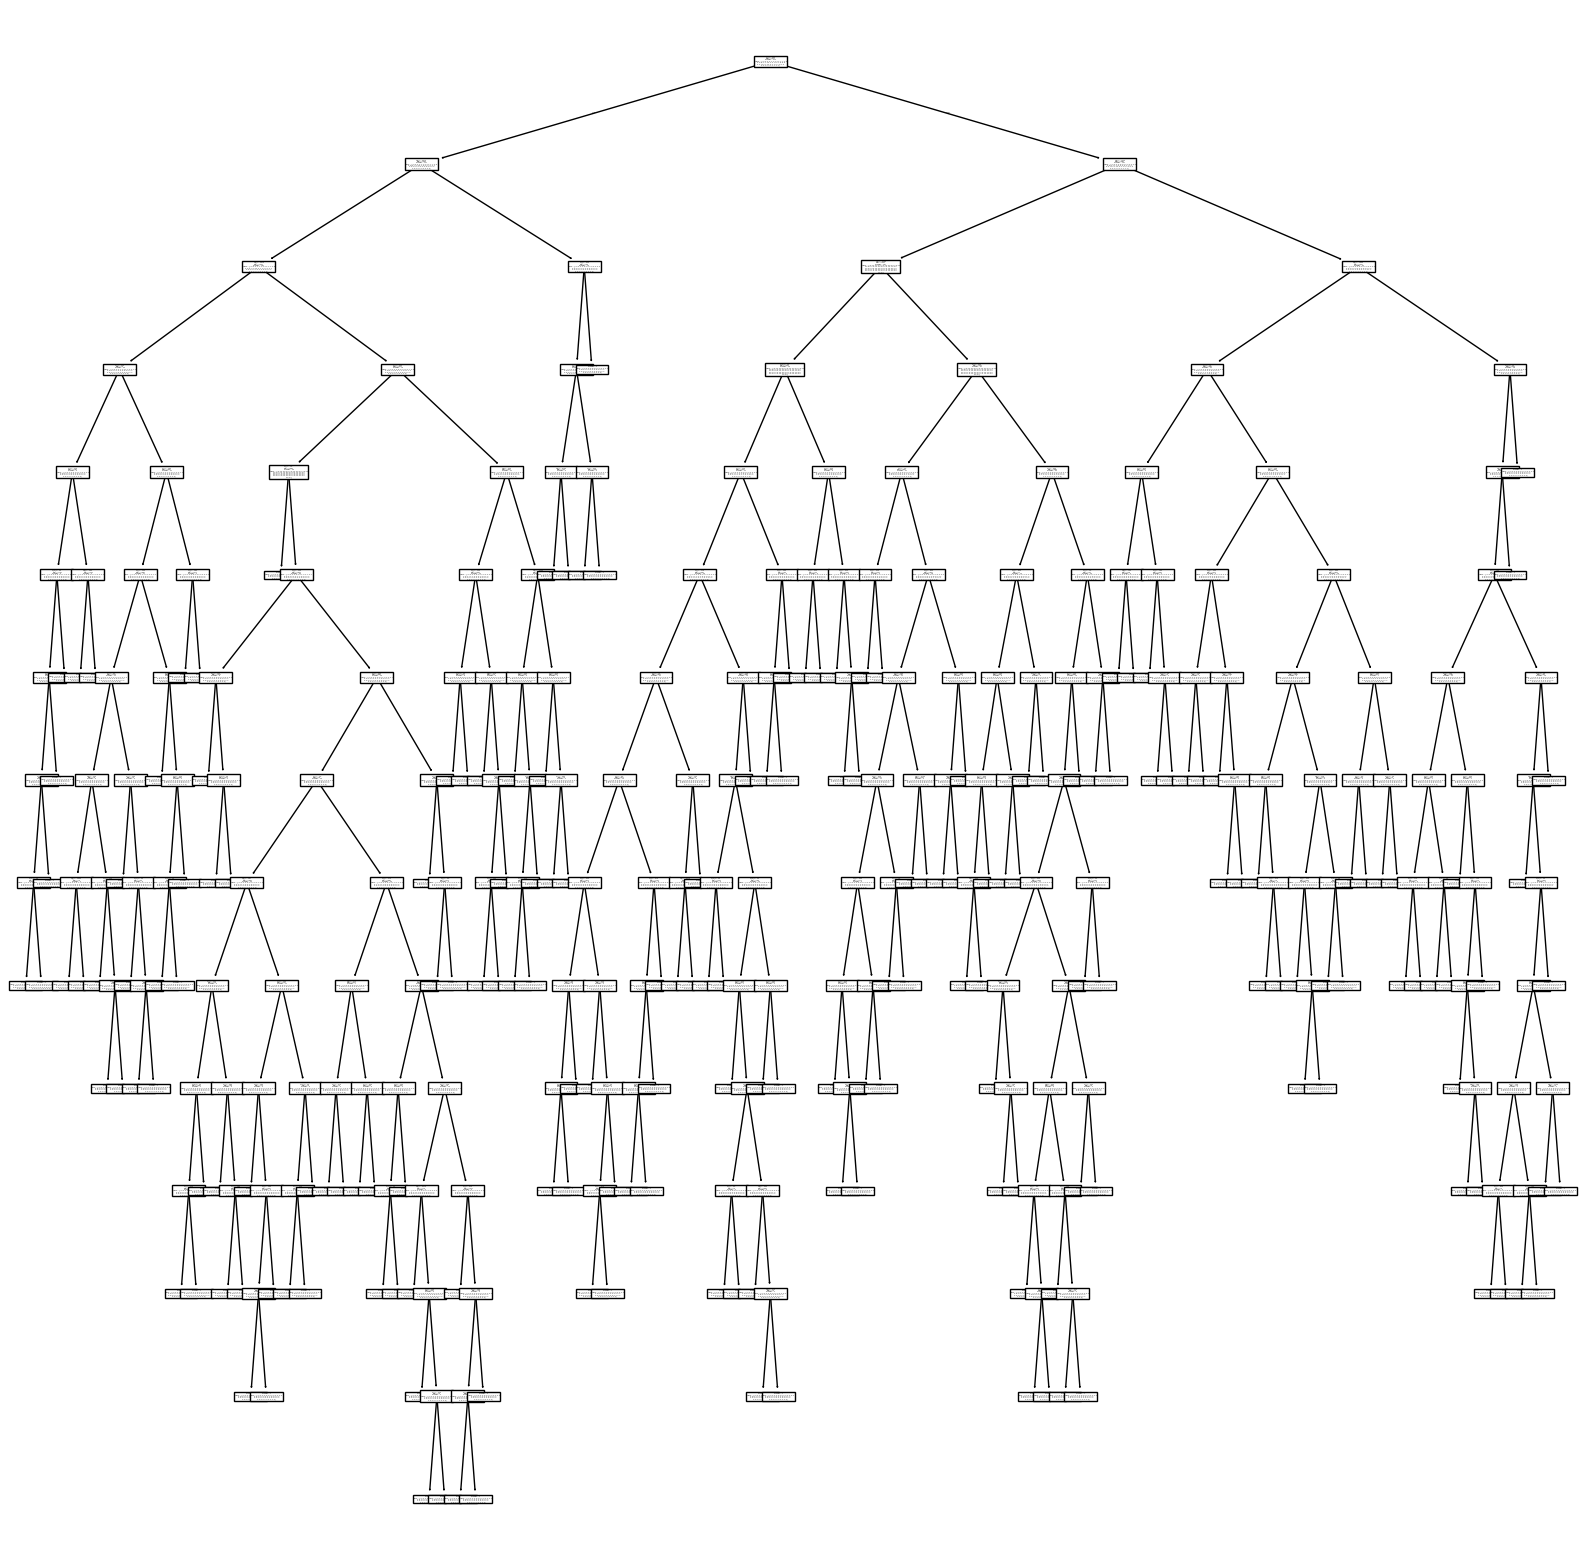

In [31]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,20))
plot_tree(tree_clf);

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [32]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [33]:

y_pred = tree_clf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar el resultado
print(f"MAPE: {mape}%")


MAE: 5.614285714285714
MAPE: 8.503549091125537%


### Ejercicio 10

Vuelve a representar su árbol

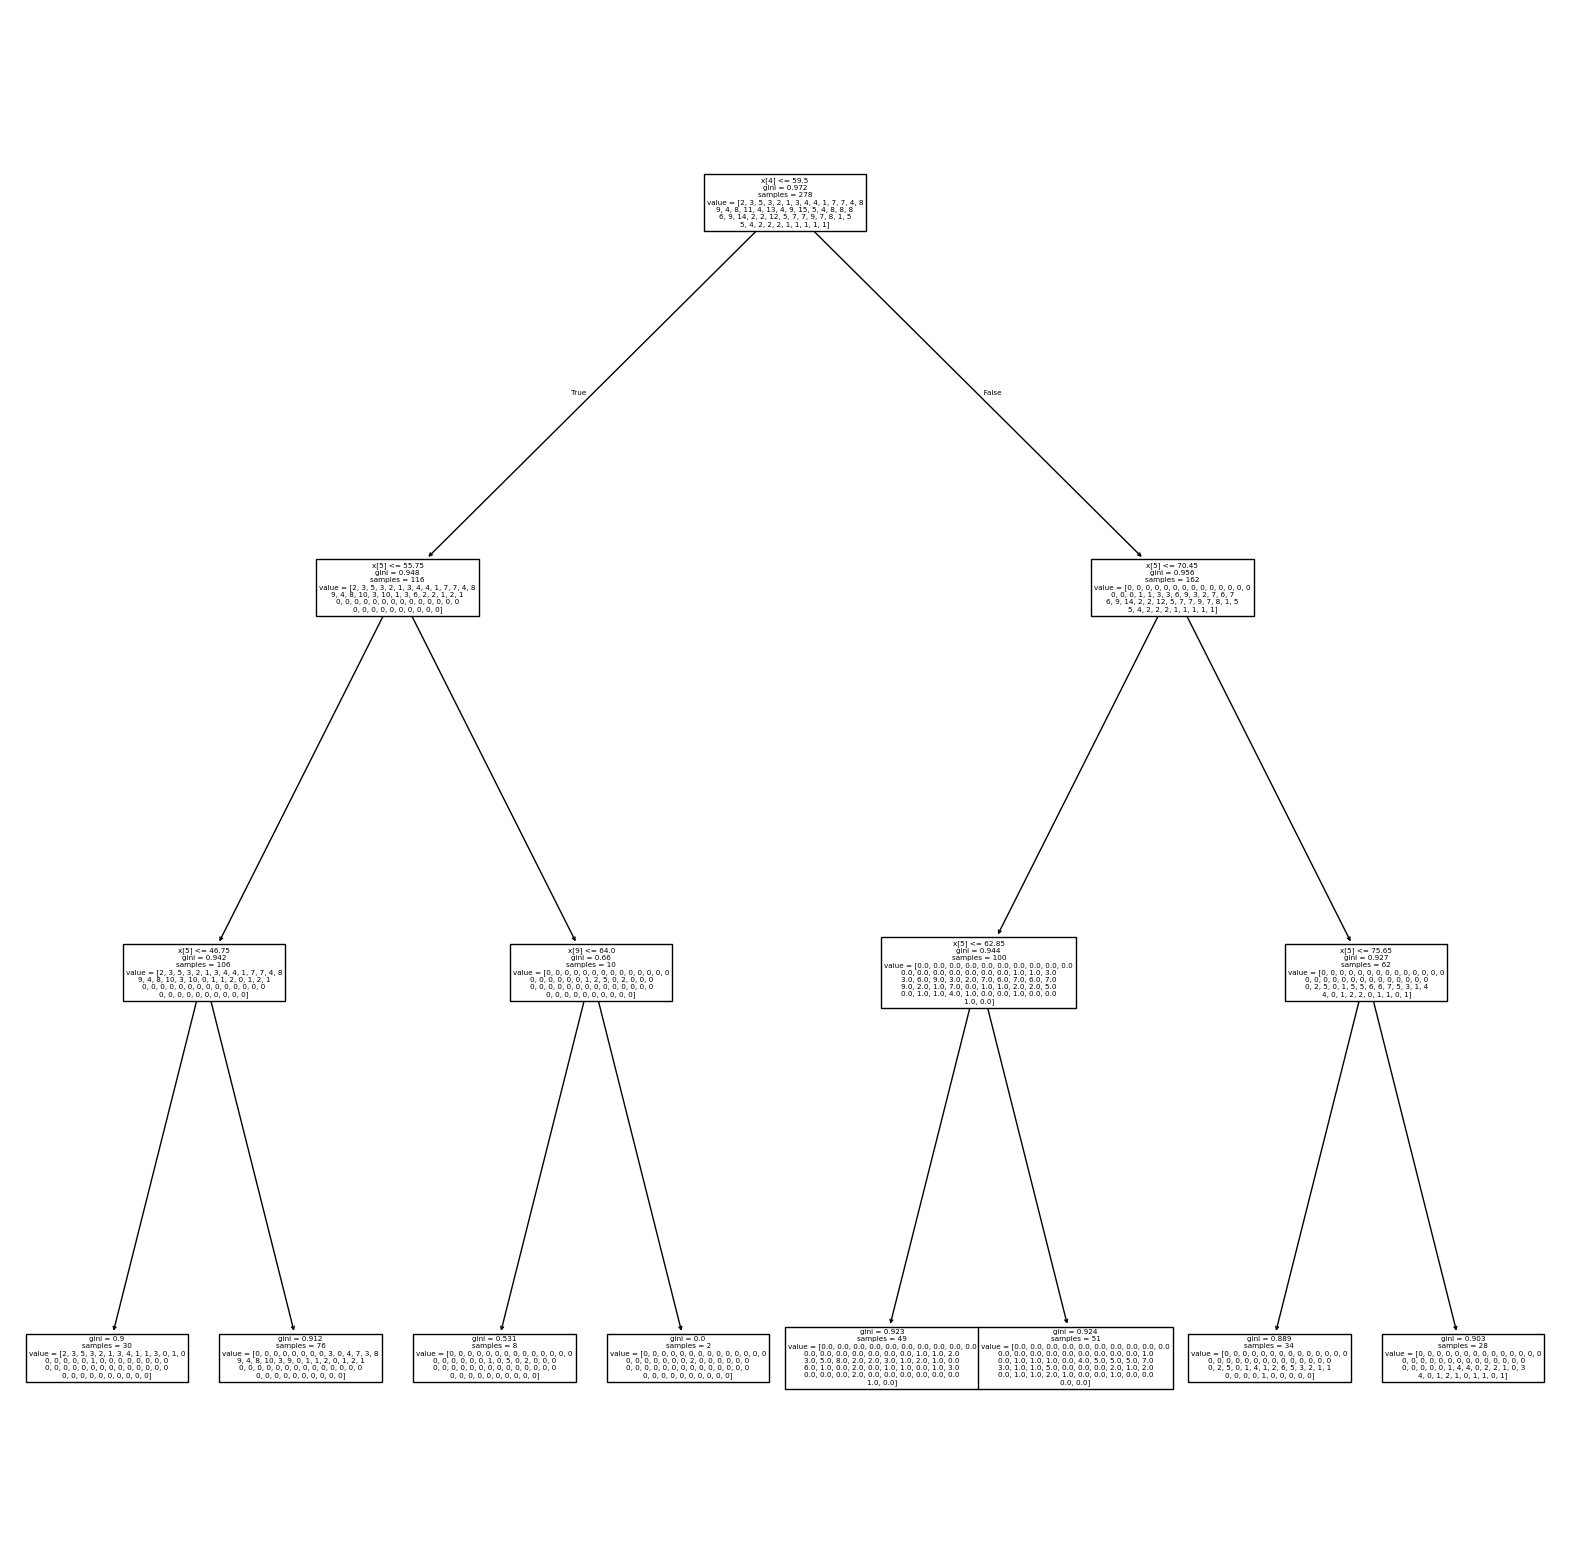

In [34]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,20))
plot_tree(tree_clf);

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [35]:
# Obtener las importancias de las características
importances = tree_clf.feature_importances_

# Mostrar las importancias de cada característica
for i, importance in enumerate(importances):
    print(f"Feature {i}: Importance {importance}")

Feature 0: Importance 0.0
Feature 1: Importance 0.0
Feature 2: Importance 0.0
Feature 3: Importance 0.0
Feature 4: Importance 0.2467309290660917
Feature 5: Importance 0.6455103960975309
Feature 6: Importance 0.0
Feature 7: Importance 0.0
Feature 8: Importance 0.0
Feature 9: Importance 0.10775867483637748
Feature 10: Importance 0.0
Feature 11: Importance 0.0
Feature 12: Importance 0.0
Feature 13: Importance 0.0
Feature 14: Importance 0.0
Feature 15: Importance 0.0
Feature 16: Importance 0.0
